# Singapore  Resale Flat Prices Predicting


In [1]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
import re
from sklearn import metrics

In [2]:
df1 = pd.read_csv(r"C:\Users\YOGA\OneDrive\Documents\singapore resale dataset\ResaleFlatPricesBasedonApprovalDate19901999.csv")
df2 = pd.read_csv(r"C:\Users\YOGA\OneDrive\Documents\singapore resale dataset\ResaleFlatPricesBasedonApprovalDate2000Feb2012.csv")
df3 = pd.read_csv(r"C:\Users\YOGA\OneDrive\Documents\singapore resale dataset\ResaleFlatPricesBasedonRegistrationDateFromMar2012toDec2014.csv")
df4 = pd.read_csv(r"C:\Users\YOGA\OneDrive\Documents\singapore resale dataset\ResaleFlatPricesBasedonRegistrationDateFromJan2015toDec2016.csv")
df5 = pd.read_csv(r"C:\Users\YOGA\OneDrive\Documents\singapore resale dataset\ResaleflatpricesbasedonregistrationdatefromJan2017onwards.csv")

In [4]:
# merging all the datasets
merged_df = pd.concat([df1, df2, df3, df4, df5], ignore_index=True)

In [5]:
merged_df.shape

(914681, 11)

In [6]:
merged_df.head(5)

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price,remaining_lease
0,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,10 TO 12,31.0,IMPROVED,1977,9000.0,NaN
1,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,04 TO 06,31.0,IMPROVED,1977,6000.0,NaN
2,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,10 TO 12,31.0,IMPROVED,1977,8000.0,NaN
3,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,07 TO 09,31.0,IMPROVED,1977,6000.0,NaN
4,1990-01,ANG MO KIO,3 ROOM,216,ANG MO KIO AVE 1,04 TO 06,73.0,NEW GENERATION,1976,47200.0,NaN


In [7]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 914681 entries, 0 to 914680
Data columns (total 11 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   month                914681 non-null  object 
 1   town                 914681 non-null  object 
 2   flat_type            914681 non-null  object 
 3   block                914681 non-null  object 
 4   street_name          914681 non-null  object 
 5   storey_range         914681 non-null  object 
 6   floor_area_sqm       914681 non-null  float64
 7   flat_model           914681 non-null  object 
 8   lease_commence_date  914681 non-null  int64  
 9   resale_price         914681 non-null  float64
 10  remaining_lease      205631 non-null  object 
dtypes: float64(2), int64(1), object(8)
memory usage: 76.8+ MB


In [8]:
merged_df.isnull().sum()

month                       0
town                        0
flat_type                   0
block                       0
street_name                 0
storey_range                0
floor_area_sqm              0
flat_model                  0
lease_commence_date         0
resale_price                0
remaining_lease        709050
dtype: int64

In [9]:
merged_df['remaining_lease'].fillna('0',inplace = True)

In [10]:
merged_df.isnull().sum()

month                  0
town                   0
flat_type              0
block                  0
street_name            0
storey_range           0
floor_area_sqm         0
flat_model             0
lease_commence_date    0
resale_price           0
remaining_lease        0
dtype: int64

In [11]:
merged_df.shape

(914681, 11)

In [12]:
merged_df.columns

Index(['month', 'town', 'flat_type', 'block', 'street_name', 'storey_range',
       'floor_area_sqm', 'flat_model', 'lease_commence_date', 'resale_price',
       'remaining_lease'],
      dtype='object')

In [13]:
merged_df['flat_type'].unique()

array(['1 ROOM', '3 ROOM', '4 ROOM', '5 ROOM', '2 ROOM', 'EXECUTIVE',
       'MULTI GENERATION', 'MULTI-GENERATION'], dtype=object)

In [14]:
#replacing MULTI-GENERATION with MULTI GENERATION
merged_df['flat_type'] = merged_df['flat_type'].replace('MULTI-GENERATION','MULTI GENERATION')
merged_df['flat_type'].unique()

array(['1 ROOM', '3 ROOM', '4 ROOM', '5 ROOM', '2 ROOM', 'EXECUTIVE',
       'MULTI GENERATION'], dtype=object)

In [15]:
merged_df['floor_area_sqm'].unique()

array([ 31. ,  73. ,  67. ,  82. ,  74. ,  88. ,  89. ,  83. ,  68. ,
        75. ,  81. ,  91. ,  92. ,  97. ,  90. ,  98. ,  99. , 100. ,
        93. , 103. , 119. , 120. , 118. , 121. , 135. , 117. ,  45. ,
        65. ,  59. ,  70. ,  76. ,  84. , 104. , 105. , 125. , 132. ,
       139. , 123. , 143. , 151. ,  69. , 106. , 107. , 116. , 149. ,
       141. , 146. , 148. , 145. , 154. , 150. ,  29. ,  51. ,  61. ,
        63. ,  64. ,  72. ,  58. ,  66. ,  60. ,  53. ,  54. ,  56. ,
        77. , 133. , 131. , 115. ,  43. ,  38. ,  41. ,  85. , 111. ,
       101. , 112. , 137. , 127. , 147. , 163. ,  50. ,  40. ,  60.3,
        62. ,  55. ,  57. ,  52. ,  63.1, 102. ,  83.1, 126. , 140. ,
       142. ,  71. , 108. , 144. ,  96. , 114. , 157. , 152. , 155. ,
        87. , 109. , 110. ,  94. , 134. , 122. , 128. ,  78. ,  46. ,
        42. ,  49. ,  47. ,  86. , 156. ,  79. ,  80. , 124. ,  28. ,
       113. ,  95. , 160. , 136. ,  48. , 138. , 161. ,  39. , 130. ,
       159. , 206. ,

In [16]:
merged_df['block'].unique()

array(['309', '216', '211', ..., '323D', '606B', '462D'], dtype=object)

In [17]:
# Converting the block column to int
merged_df['block'] = merged_df['block'].astype(str)
merged_df['block'] = merged_df['block'].apply(lambda x: ''.join(char for char in x if char in '0123456789'))

In [18]:
merged_df['flat_model'].unique()

array(['IMPROVED', 'NEW GENERATION', 'MODEL A', 'STANDARD', 'SIMPLIFIED',
       'MODEL A-MAISONETTE', 'APARTMENT', 'MAISONETTE', 'TERRACE',
       '2-ROOM', 'IMPROVED-MAISONETTE', 'MULTI GENERATION',
       'PREMIUM APARTMENT', 'Improved', 'New Generation', 'Model A',
       'Standard', 'Apartment', 'Simplified', 'Model A-Maisonette',
       'Maisonette', 'Multi Generation', 'Adjoined flat',
       'Premium Apartment', 'Terrace', 'Improved-Maisonette',
       'Premium Maisonette', '2-room', 'Model A2', 'DBSS', 'Type S1',
       'Type S2', 'Premium Apartment Loft', '3Gen'], dtype=object)

In [19]:
merged_df['town'].unique()

array(['ANG MO KIO', 'BEDOK', 'BISHAN', 'BUKIT BATOK', 'BUKIT MERAH',
       'BUKIT TIMAH', 'CENTRAL AREA', 'CHOA CHU KANG', 'CLEMENTI',
       'GEYLANG', 'HOUGANG', 'JURONG EAST', 'JURONG WEST',
       'KALLANG/WHAMPOA', 'MARINE PARADE', 'QUEENSTOWN', 'SENGKANG',
       'SERANGOON', 'TAMPINES', 'TOA PAYOH', 'WOODLANDS', 'YISHUN',
       'LIM CHU KANG', 'SEMBAWANG', 'BUKIT PANJANG', 'PASIR RIS',
       'PUNGGOL'], dtype=object)

In [20]:
merged_df['month'].unique()

array(['1990-01', '1990-02', '1990-03', '1990-04', '1990-05', '1990-06',
       '1990-07', '1990-08', '1990-09', '1990-10', '1990-11', '1990-12',
       '1991-01', '1991-02', '1991-03', '1991-04', '1991-05', '1991-06',
       '1991-07', '1991-08', '1991-09', '1991-10', '1991-11', '1991-12',
       '1992-01', '1992-02', '1992-03', '1992-04', '1992-05', '1992-06',
       '1992-07', '1992-08', '1992-09', '1992-10', '1992-11', '1992-12',
       '1993-01', '1993-02', '1993-03', '1993-04', '1993-05', '1993-06',
       '1993-07', '1993-08', '1993-09', '1993-10', '1993-11', '1993-12',
       '1994-01', '1994-02', '1994-03', '1994-04', '1994-05', '1994-06',
       '1994-07', '1994-08', '1994-09', '1994-10', '1994-11', '1994-12',
       '1995-01', '1995-02', '1995-03', '1995-04', '1995-05', '1995-06',
       '1995-07', '1995-08', '1995-09', '1995-10', '1995-11', '1995-12',
       '1996-01', '1996-02', '1996-03', '1996-04', '1996-05', '1996-06',
       '1996-07', '1996-08', '1996-09', '1996-10', 

In [21]:
#splitting month column to year and month
merged_df['reg_year'] = merged_df['month'].apply(lambda x: int(x.split('-')[0]))
merged_df['reg_month'] = merged_df['month'].apply(lambda x: int(x.split('-')[1]))

In [22]:
merged_df['lease_commence_date'].unique()

array([1977, 1976, 1978, 1979, 1984, 1980, 1985, 1981, 1982, 1986, 1972,
       1983, 1973, 1969, 1975, 1971, 1974, 1967, 1970, 1968, 1988, 1987,
       1989, 1990, 1992, 1993, 1994, 1991, 1995, 1996, 1997, 1998, 1999,
       2000, 2001, 1966, 2002, 2006, 2003, 2005, 2004, 2008, 2007, 2009,
       2010, 2012, 2011, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2022,
       2020], dtype=int64)

In [23]:
merged_df['street_name'].unique()

array(['ANG MO KIO AVE 1', 'ANG MO KIO AVE 3', 'ANG MO KIO AVE 4',
       'ANG MO KIO AVE 10', 'ANG MO KIO AVE 5', 'ANG MO KIO AVE 8',
       'ANG MO KIO AVE 6', 'ANG MO KIO AVE 9', 'ANG MO KIO AVE 2',
       'BEDOK RESERVOIR RD', 'BEDOK NTH ST 3', 'BEDOK STH RD',
       'NEW UPP CHANGI RD', 'BEDOK NTH RD', 'BEDOK STH AVE 1',
       'CHAI CHEE RD', 'CHAI CHEE DR', 'BEDOK NTH AVE 4',
       'BEDOK STH AVE 3', 'BEDOK STH AVE 2', 'BEDOK NTH ST 2',
       'BEDOK NTH ST 4', 'BEDOK NTH AVE 2', 'BEDOK NTH AVE 3',
       'BEDOK NTH AVE 1', 'BEDOK NTH ST 1', 'CHAI CHEE ST', 'SIN MING RD',
       'SHUNFU RD', 'BT BATOK ST 11', 'BT BATOK WEST AVE 8',
       'BT BATOK WEST AVE 6', 'BT BATOK ST 21', 'BT BATOK EAST AVE 5',
       'BT BATOK EAST AVE 4', 'HILLVIEW AVE', 'BT BATOK CTRL',
       'BT BATOK ST 31', 'BT BATOK EAST AVE 3', 'TAMAN HO SWEE',
       'TELOK BLANGAH CRES', 'BEO CRES', 'TELOK BLANGAH DR', 'DEPOT RD',
       'TELOK BLANGAH RISE', 'JLN BT MERAH', 'HENDERSON RD', 'INDUS RD',
       

          flat_type  flat_model
0            1 ROOM           2
1            2 ROOM           9
2            3 ROOM          15
3            4 ROOM          18
4            5 ROOM          17
5         EXECUTIVE           8
6  MULTI GENERATION           2


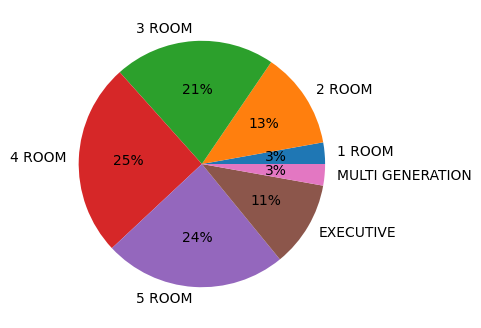

In [24]:
temp = pd.DataFrame(merged_df.groupby('flat_type')['flat_model'].nunique()).reset_index()
print(temp)
plt.figure(figsize = (5,4))
plt.pie(temp['flat_model'], labels = temp['flat_type'], autopct = '%.0f%%')
plt.show()

ValueError: Could not interpret value `Type` for `x`. An entry with this name does not appear in `data`.

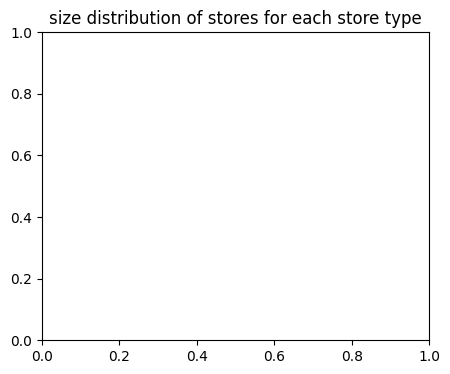

In [26]:
import seaborn as sns


plt.figure(figsize = (5,4))
plt.title('size distribution of stores for each store type')
sns.boxplot(x = 'flat_type', y ='floor_area_sqm', data = merged_df, showfliers = False)

In [107]:
# Use LabelEncoder to convert 'street_name','flat_model' ,'flat_type' ,'town' to numeric
label_encoder = LabelEncoder()
merged_df['street_name'] = label_encoder.fit_transform(merged_df['street_name'])

In [108]:
label_encoder = LabelEncoder()
merged_df['flat_type'] = label_encoder.fit_transform(merged_df['flat_type'])

In [109]:
label_encoder = LabelEncoder()
merged_df['flat_model'] = label_encoder.fit_transform(merged_df['flat_model'])

In [110]:
label_encoder = LabelEncoder()
merged_df['town'] = label_encoder.fit_transform(merged_df['town'])

In [111]:
label_encoder = LabelEncoder()
merged_df['storey_range'] = label_encoder.fit_transform(merged_df['storey_range'])

In [112]:
merged_df.drop(columns='month', inplace=True)

In [113]:
merged_df.head(1)

,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price,remaining_lease,reg_year,reg_month
0,0,0,309,13,5,31.0,7,1977,9000.0,0,1990,1


In [114]:
merged_df.drop("remaining_lease",inplace = True , axis = 1)

In [115]:
merged_df['street_name'].unique()

array([ 13,  16,  17,  14,  18,  20,  19,  21,  15,  45,  42,  50, 340,
        39,  47, 115, 114,  38,  49,  48,  41,  43,  36,  37,  35,  40,
       116, 437, 425,  70,  86,  84,  71,  68,  67, 200,  65,  75,  66,
       448, 487,  52, 488, 166, 490, 236, 199, 228,  90, 198,  92, 489,
       178, 292, 385, 226, 197, 241, 248, 235, 294, 335, 492, 299, 298,
       175, 382, 181, 242, 345, 424, 397, 505, 510, 380,  97, 393, 392,
        30, 438, 509, 484, 486, 143, 512, 142, 145, 144, 141, 513, 151,
       152, 149,  99, 146, 150, 139, 322, 246, 192, 176, 434,   5, 189,
       163, 366, 196,  31, 238, 191, 177, 208, 210, 205, 218, 206, 318,
       216, 212, 217, 483, 255, 260, 256, 257, 258, 259, 347, 579, 201,
       227,  61,  60,  62, 271, 268, 261, 269, 233, 441, 342, 186,  33,
       514, 504,  51, 517, 320, 285, 188, 167, 346, 291, 232, 338, 501,
       247, 290,   2, 300, 162, 324, 325, 327, 100, 102, 481, 101, 170,
       323, 194, 169, 442, 334, 203, 202, 204, 168, 398, 319, 42

In [116]:
# Split the data into features and target
x = merged_df[['town','flat_type','block','street_name','storey_range','storey_range','flat_model','lease_commence_date','reg_year','reg_year']]
y = merged_df['resale_price']

## Model Selection and Training

In [117]:
from sklearn.model_selection import train_test_split

# Split the data into train and test
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [118]:
x_train

,town,flat_type,block,street_name,storey_range,storey_range,flat_model,lease_commence_date,reg_year,reg_year
235758,8,4,236,127,2,2,7,1989,1999,1999
519639,18,3,176,173,5,5,16,2003,2007,2007
422166,26,4,799,563,4,4,9,1987,2003,2003
508246,8,4,688,126,7,7,9,2003,2006,2006
119337,22,3,523,423,2,2,12,1992,1996,1996
...,...,...,...,...,...,...,...,...,...,...
259178,11,2,328,210,5,5,20,1983,1999,1999
365838,25,4,214,330,13,13,9,1981,2002,2002
131932,1,2,537,42,2,2,20,1980,1996,1996
671155,21,3,275,157,0,0,23,2009,2012,2012


In [119]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error

linear_regression = LinearRegression()
linear_regression.fit(x_train , y_train)
y_pred = linear_regression.predict(x_test)

print(f'MAE = {metrics.mean_absolute_error(y_test,y_pred)}')
print(f'MSE = {metrics.mean_squared_error(y_test,y_pred)}')
print(f'RMSE  = {np.sqrt(metrics.mean_squared_error(y_test,y_pred))}')
print(f'R2 Score = {linear_regression.score(x_test,y_test)}')

MAE = 61011.94017026263
MSE = 6689737492.633186
RMSE  = 81790.81545401773
R2 Score = 0.7603616688969623


In [120]:
from sklearn.tree import DecisionTreeRegressor

decision_tree_regressor = DecisionTreeRegressor()
decision_tree_regressor.fit(x_train, y_train)
y_pred = decision_tree_regressor.predict(x_test)

print(f'MAE is - {metrics.mean_absolute_error(y_test, y_pred)}')
print(f'MAE is - {metrics.mean_squared_error(y_test, y_pred)}')
print(f'RMSE is - {np.sqrt(metrics.mean_squared_error(y_test, y_pred))}')
print(f'R2 Score is - {decision_tree_regressor.score(x_test, y_test)}')

MAE is - 21043.925024738855
MAE is - 949832652.9357234
RMSE is - 30819.35516742236
R2 Score is - 0.9659752999236008


In [121]:
from sklearn.ensemble import RandomForestRegressor

rf_regressor = RandomForestRegressor(n_estimators=50, max_depth=10)
rf_regressor.fit(x_train, y_train)
y_pred = rf_regressor.predict(x_test)

print(f'MAE is - {metrics.mean_absolute_error(y_test, y_pred)}')
print(f'MAE is - {metrics.mean_squared_error(y_test, y_pred)}')
print(f'RMSE is - {np.sqrt(metrics.mean_squared_error(y_test, y_pred))}')
print(f'Accuracy Score is - {rf_regressor.score(x_test, y_test)}')

MAE is - 32880.70710876553
MAE is - 2274852724.9796686
RMSE is - 47695.4161841541
Accuracy Score is - 0.9185107171814079


## saving the decisiontree model

In [122]:
import pickle

In [123]:
with open ('dt.pkl', 'wb') as f:
    pickle.dump(decision_tree_regressor , f)